In [408]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [409]:
df = pd.read_csv('C:\\Users\\mufas\\Downloads\\housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [410]:
(df == 0).sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [411]:
df.shape

(20640, 10)

In [412]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [414]:
# Here we can see only few Null values  
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [415]:
df.duplicated().sum()

0

# There is no duplicate values in the dataset

In [416]:
df.total_rooms.value_counts()

total_rooms
1527.0     18
1582.0     17
1613.0     17
2127.0     16
1717.0     15
           ..
7478.0      1
8207.0      1
21533.0     1
17032.0     1
10035.0     1
Name: count, Length: 5926, dtype: int64

In [417]:
df.population.value_counts()

population
891.0      25
761.0      24
850.0      24
1052.0     24
1227.0     24
           ..
3563.0      1
2878.0      1
10323.0     1
5217.0      1
6912.0      1
Name: count, Length: 3888, dtype: int64

# Now we will check the outliers part in the dataset

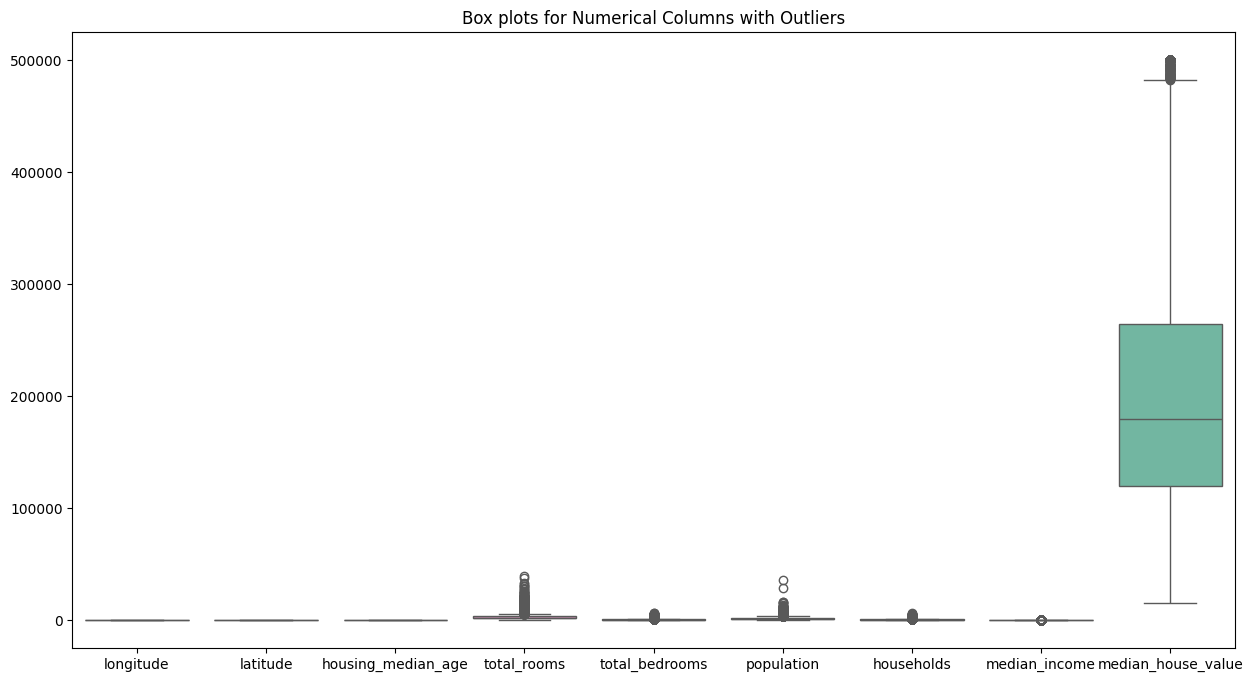

In [418]:
# Create a box plot for each numerical column in the DataFrame
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, orient='v', palette='Set2')
plt.title('Box plots for Numerical Columns with Outliers')
plt.show()

<Axes: xlabel='total_rooms'>

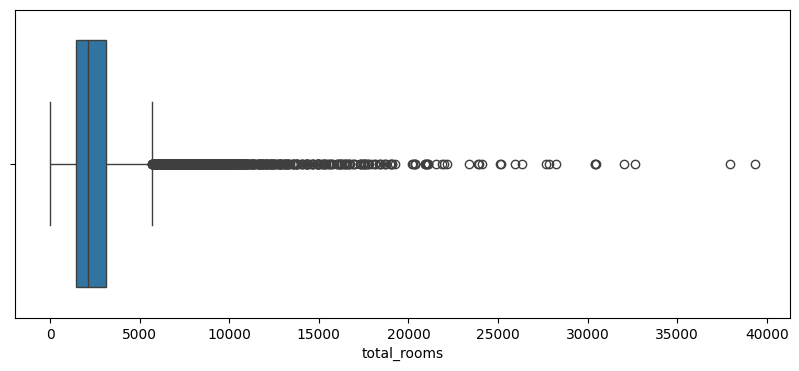

In [419]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df.total_rooms)

<Axes: xlabel='total_rooms'>

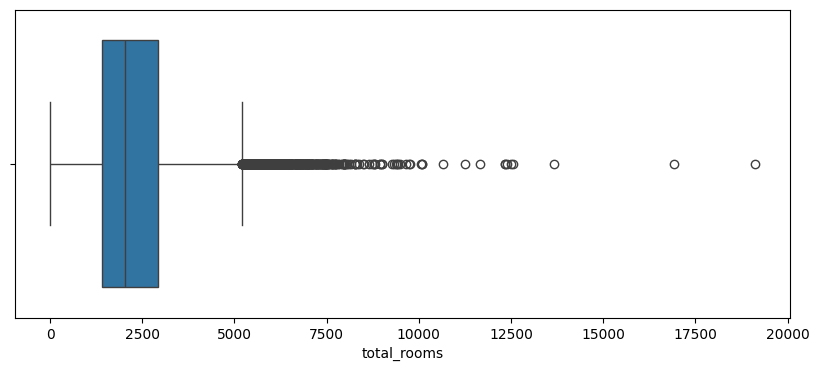

In [420]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=filtered_df.total_rooms)

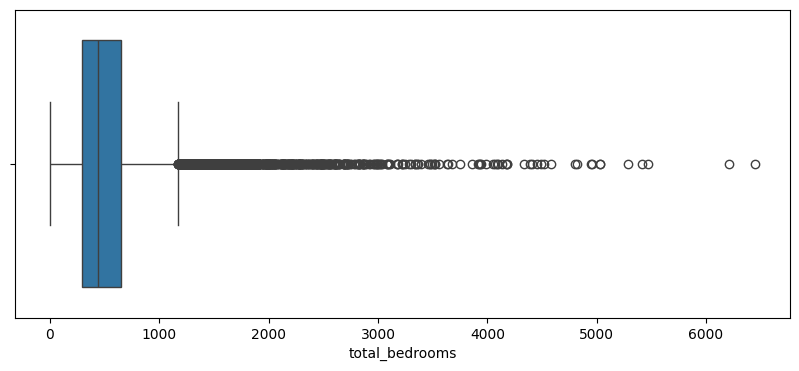

In [421]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df.total_bedrooms)
plt.show()

<Axes: xlabel='population'>

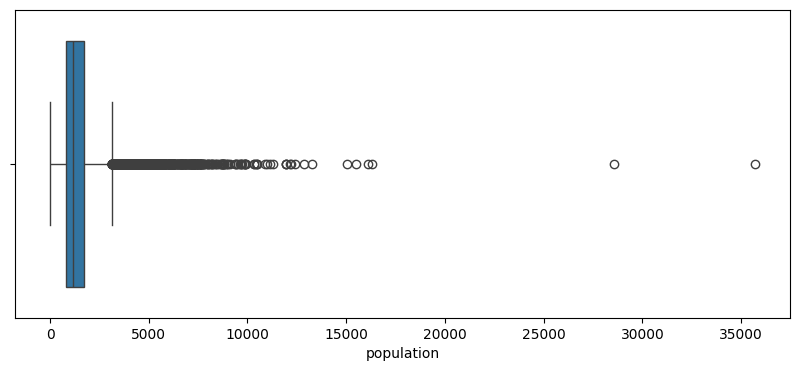

In [422]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df.population)

<Axes: xlabel='households'>

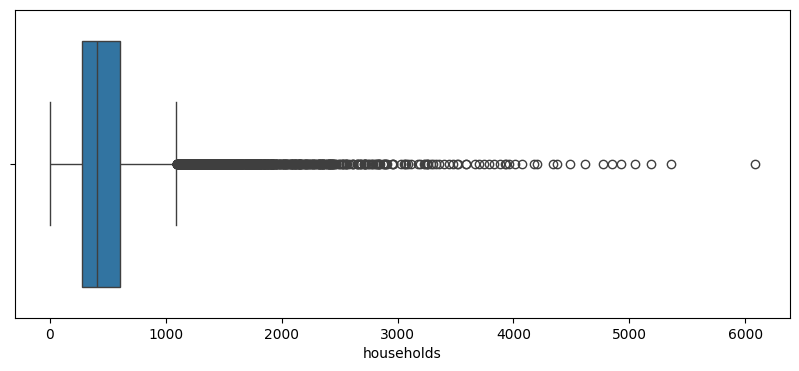

In [423]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df.households)

<Axes: xlabel='median_house_value'>

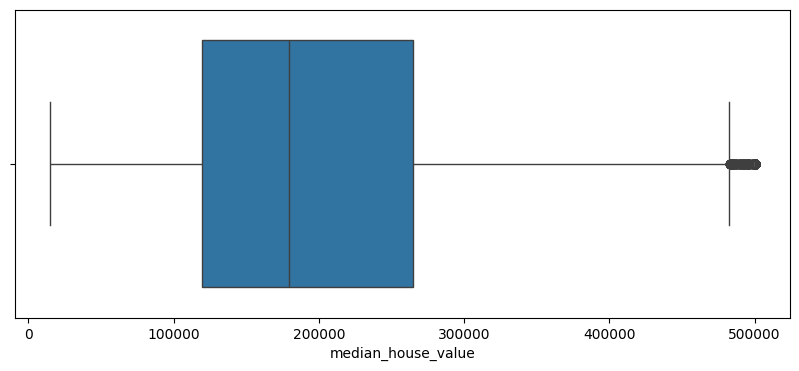

In [424]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df.median_house_value)

## There seems to be Huge range of Outliers in the dataset in some of the columns we will remove some outliers which will effect  our dataset for not become a nosiy data for our model

## Here we are useing IQR method for the removal of Outliers

In [425]:
Q1 = df['total_rooms'].describe()[4]
Q3 = df['total_rooms'].describe()[6]

print(Q1,Q3)

1447.75 3148.0


C:\Users\mufas\AppData\Local\Temp\ipykernel_16388\1850673050.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q1 = df['total_rooms'].describe()[4]
C:\Users\mufas\AppData\Local\Temp\ipykernel_16388\1850673050.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q3 = df['total_rooms'].describe()[6]


In [426]:
IQR = Q3 - Q1
Lower_Fence = Q1 - 1.5* IQR
Upper_Fence = Q3 + 1.5*IQR

print(f'IQR: {IQR}')
print('**************************************************')
print(f'Lower_Fence :{Lower_Fence} ,  Upper_Fence :  {Upper_Fence}')

IQR: 1700.25
**************************************************
Lower_Fence :-1102.625 ,  Upper_Fence :  5698.375


In [428]:
df[((df['total_rooms'] < Lower_Fence) |  (df['total_rooms'] > Upper_Fence))]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
107,-118.39,34.08,27.0,6605.0,1710.0,2665.0,1520.0,3.8088,500001.0,<1H OCEAN
117,-117.47,34.12,6.0,10565.0,1767.0,5690.0,1555.0,4.1797,141000.0,INLAND
146,-122.51,38.06,24.0,9493.0,1935.0,5162.0,1880.0,3.0742,118800.0,NEAR BAY
149,-118.26,33.85,24.0,9071.0,1335.0,4558.0,1327.0,5.5420,197500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND
20567,-121.79,38.66,15.0,6809.0,1052.0,3060.0,1060.0,5.3064,165000.0,INLAND


In [429]:
df2 = df[~((df['total_rooms'] < Lower_Fence) |  (df['total_rooms'] > Upper_Fence))]

In [430]:
df2.shape

(19353, 10)

In [431]:
Outliers = len(df) - len(df2)

In [432]:
print(f'Outliers in the Dataset : {Outliers}')

Outliers in the Dataset : 1287


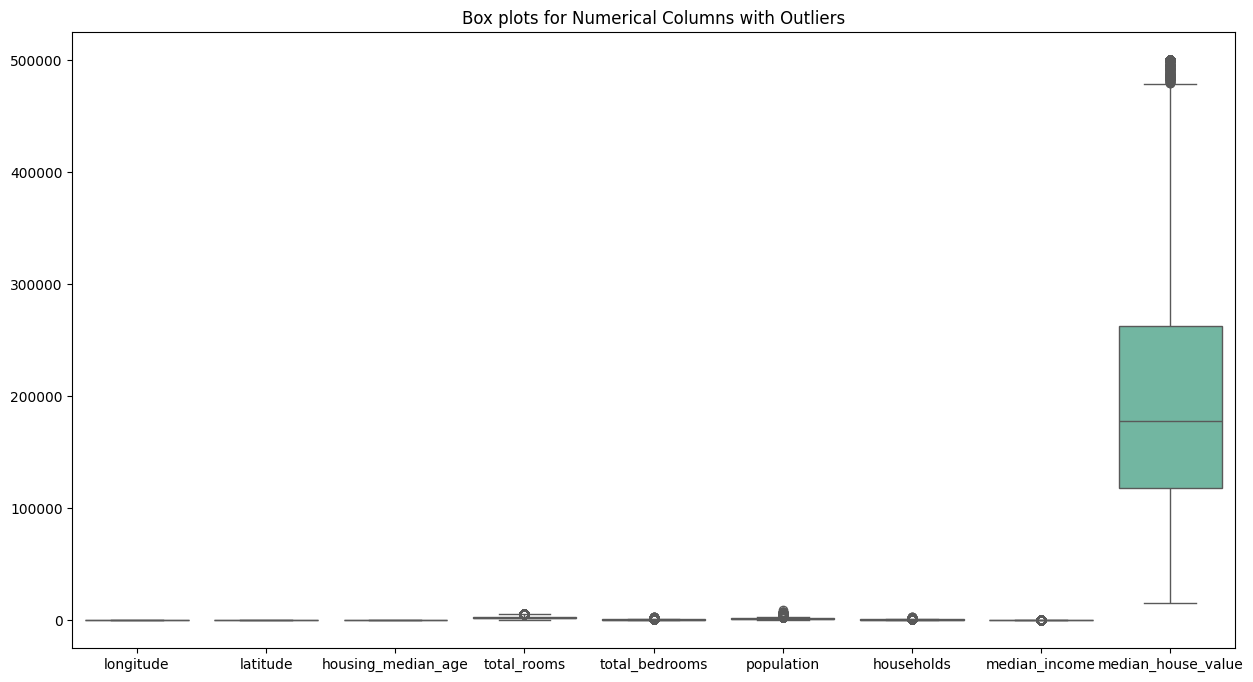

In [433]:
# Create a box plot for each numerical column in the DataFrame
plt.figure(figsize=(15, 8))
sns.boxplot(data=df2, orient='v', palette='Set2')
plt.title('Box plots for Numerical Columns with Outliers')
plt.show()

<Axes: xlabel='total_rooms'>

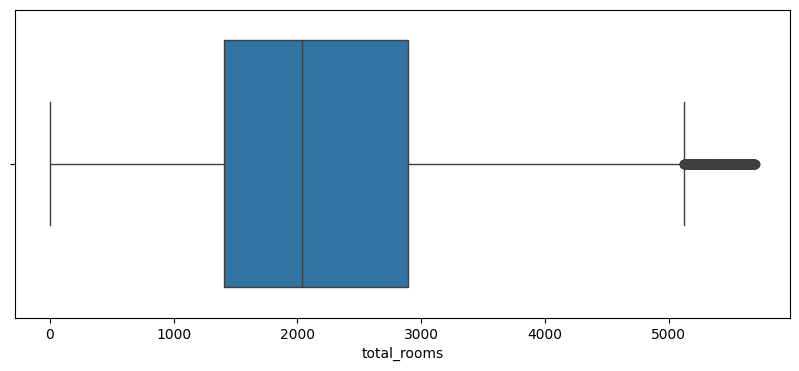

In [434]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df2.total_rooms)

<Axes: xlabel='median_house_value'>

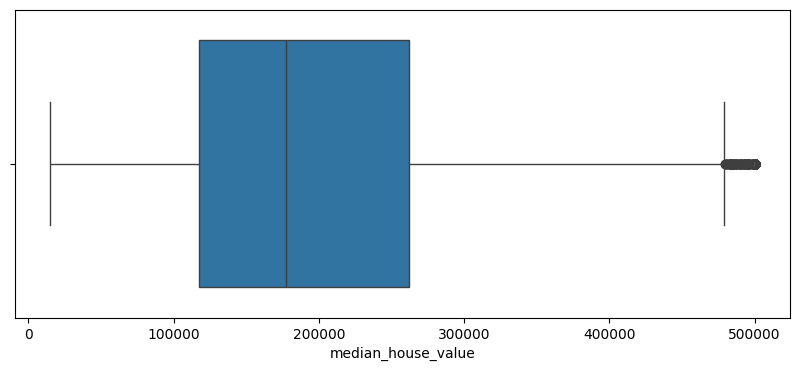

In [435]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df2.median_house_value)

In [436]:
df2.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        196
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: xlabel='households'>

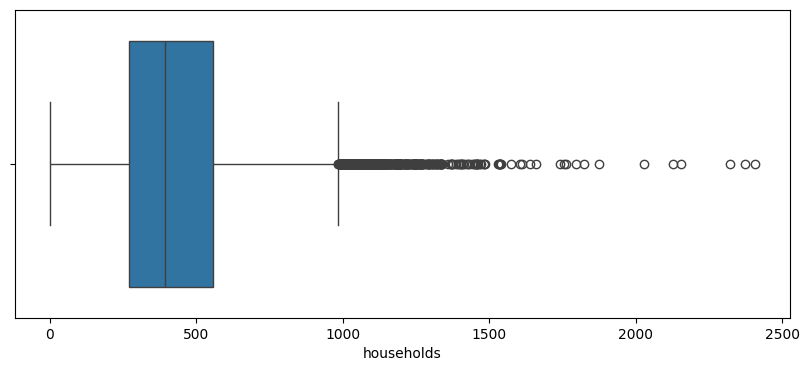

In [437]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df2.households)

<Axes: xlabel='population'>

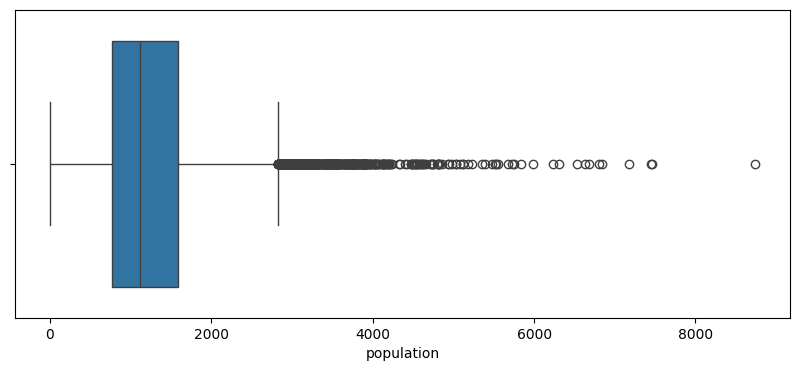

In [438]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df2.population)

# After removing outliers there are 196 few null values has to be filled 

In [439]:
df2.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        196
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [448]:
df['total_bedrooms'].value_counts()

total_bedrooms
280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
1609.0     1
1591.0     1
2506.0     1
2238.0     1
1052.0     1
Name: count, Length: 1923, dtype: int64

In [449]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

## We will fill the total_bedroom column by using fillna function and the method in it is 'ffill'(frontfill)

In [454]:
df2['total_bedrooms'] = df2['total_bedrooms'].fillna(method= 'ffill')

C:\Users\mufas\AppData\Local\Temp\ipykernel_16388\564710732.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2['total_bedrooms'] = df2['total_bedrooms'].fillna(method= 'ffill')
C:\Users\mufas\AppData\Local\Temp\ipykernel_16388\564710732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_bedrooms'] = df2['total_bedrooms'].fillna(method= 'ffill')


In [455]:
df2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64